In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


# 0.0.1 Dataset Link:
# https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification

# **1 Data Loading**

In [2]:
train = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding= 'latin-1')

In [3]:
test=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding= 'latin-1')

In [4]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


#  **2 Data Exploration:**
**2.1 a. Shape of Data**

In [6]:
train.shape

(41157, 6)

In [7]:
test.shape

(3798, 6)

**2.2 b. Size of Data**

In [8]:
train.size

246942

In [9]:
test.size

22788

**2.3 c. Attributes**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


**2.4 d. Properties**

In [12]:
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [13]:
test.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [16]:
train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [17]:
test.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

**2.5 e. EDA**

In [18]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [19]:
len(train)

41157

In [20]:
test.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [21]:
len(train)

41157

**2.6 f. Null Values**

In [22]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [23]:
train.isnull().sum()/len(train)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

In [24]:
test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [25]:
test.isnull().sum()/len(test)*100

UserName          0.000000
ScreenName        0.000000
Location         21.958926
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

**2.7 g. Unique**

In [26]:
train.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [27]:
train.nunique().sum()

135726

In [28]:
test.nunique().sum()

13131

# **3. Data Pre-processing**
**3.1 WordCloud**

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
allWords = ' '.join([twts for twts in train['OriginalTweet']])

In [31]:
allWords[:500]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P My food stock is n'

In [32]:
wordcloud = WordCloud(width=450, height=260, random_state=42,max_font_size=105).generate(allWords)

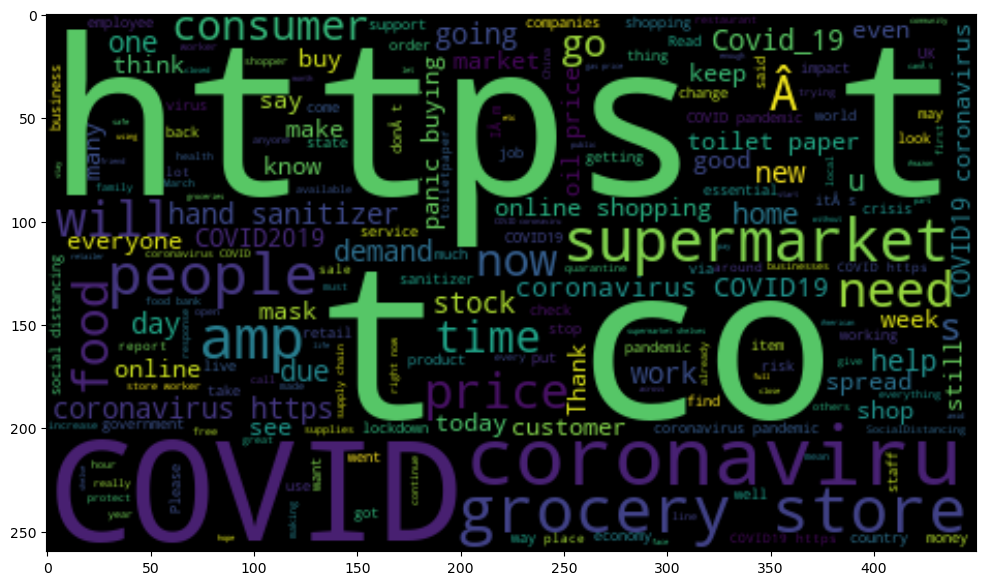

In [33]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear', cmap='viridis')
plt.show()

**3.1.1 Tweets Sentiment Distribution –> Train**

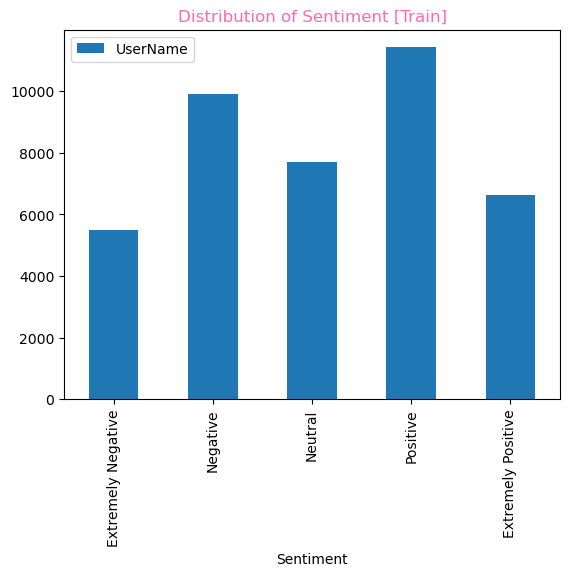

In [34]:
train.groupby(['Sentiment']) \
.count()[['UserName']] \
.reindex(['Extremely Negative','Negative','Neutral','Positive','Extremely Positive']) \
.plot(kind="bar")
plt.title("Distribution of Sentiment [Train]",color='hotpink')
plt.show()

**3.1.2 Tweets Sentiment Distribution –> Test**

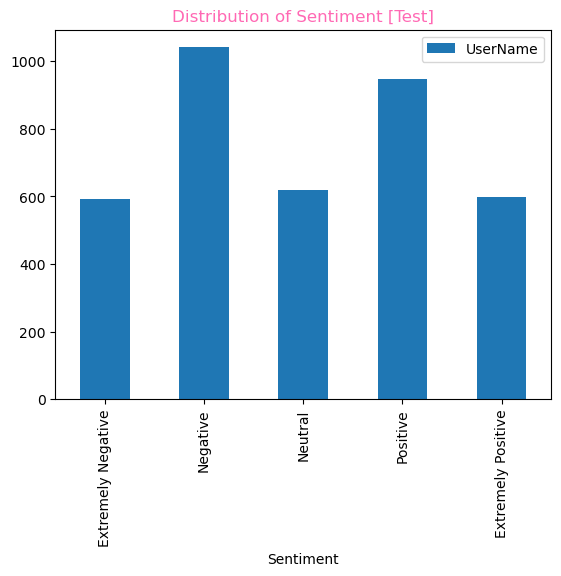

In [35]:
test.groupby(['Sentiment']) \
.count()[['UserName']] \
.reindex(['Extremely Negative','Negative','Neutral','Positive','Extremely Positive']) \
.plot(kind="bar")
plt.title("Distribution of Sentiment [Test]",color='hotpink')
plt.show()

**3.2 a. NULL Values**

In [36]:
total_null_train = train.isnull().sum().sort_values(ascending = False)
percentage_null_train=((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", train.shape[0])
missing_data = pd.concat([total_null_train, percentage_null_train.round(2)],axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)

Total records =  41157


,Total Missing,In Percent
Location,8590,20.87
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [37]:
total_null_test = test.isnull().sum().sort_values(ascending = False)
percentage_null_test=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", test.shape[0])
missing_data = pd.concat([total_null_test, percentage_null_test.round(2)],axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)

Total records =  3798


,Total Missing,In Percent
Location,834,21.96
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [38]:
# train=train.drop(columns=['Location'],axis=1,inplace=True)

In [39]:
# test=test.drop(columns=['Location'],axis=1,inplace=True)

**3.3 b. Reduction of Data**

In [40]:
train['Sentiment'].nunique()

5

In [41]:
train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [42]:
test['Sentiment'].nunique()

5

In [43]:
test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

**Extract and separate the data based on their labels**

In [44]:
train0=train[train['Sentiment']=='Negative']
train1=train[train['Sentiment']=='Positive']
train2=train[train['Sentiment']=='Neutral']
train3=train[train['Sentiment']=='Extremely Positive']
train4=train[train['Sentiment']=='Extremely Negative']

In [45]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape

((9917, 6), (11422, 6), (7713, 6), (6624, 6), (5481, 6))

**Reducing size of each label by 1/5**

In [46]:
train0=train0[:int(train0.shape[0]/5)]
train1=train1[:int(train1.shape[0]/5)]
train2=train2[:int(train2.shape[0]/5)]
train3=train3[:int(train3.shape[0]/5)]
train4=train4[:int(train4.shape[0]/5)]

In [47]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape

((1983, 6), (2284, 6), (1542, 6), (1324, 6), (1096, 6))

In [48]:
train=pd.concat([train0,train1,train2,train3,train4],axis=0)

In [49]:
train.shape

(8229, 6)

In [50]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative


**Dropping all the columns OriginalTweet rating and Sentiment**

In [51]:
train=train.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [52]:
train.head()

,OriginalTweet,Sentiment
9,"For corona prevention,we should stop to buy th...",Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative
28,Do you see malicious price increases in NYC? T...,Negative
30,There Is of in the Country The more empty she...,Negative


In [53]:
train.Sentiment.value_counts()

Positive              2284
Negative              1983
Neutral               1542
Extremely Positive    1324
Extremely Negative    1096
Name: Sentiment, dtype: int64

In [54]:
test=test.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [55]:
test.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [56]:
test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

# **3.4 c. Data Cleaning**
**3.4.1 i. Hashtag Removal**

In [57]:
import re

In [58]:
def hashtags_removal(text):
    hashtags = "#[\S]+"
    text = re.sub(hashtags,"",text)
    return text

In [59]:
#Remove Hashtags train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x:hashtags_removal(x))

In [60]:
#Remove Hashtags test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x:hashtags_removal(x))

**3.4.2 ii. Mentions Removal**

In [61]:
def mentions_removal(text):
    mentions = "@[\S]+"
    text = re.sub(mentions,"",text)
    return text

In [62]:
#Remove Mention train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x:mentions_removal(x))

In [63]:
#Remove Mention test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x:mentions_removal(x))

**3.4.3 iii. URL Removal**

In [64]:
def url_removal(text):
    url = "https?://[A-z0-9_%/\-\.]+[A-z0-9_\.\-\?&=%]+"
    text = re.sub(url,"",text)
    return text

In [65]:
#Remove URL train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: url_removal(x))

In [66]:
#Remove URL test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: url_removal(x))

**3.4.4 iv. Stopwords Removal**

In [67]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [68]:
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [69]:
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

**3.4.5 v. LowerCase**

In [70]:
train['OriginalTweet']=train['OriginalTweet'].str.lower()

In [71]:
test['OriginalTweet']=test['OriginalTweet'].str.lower()

**3.4.6 vi. Stemming**

In [72]:
import nltk
from nltk.stem import PorterStemmer

In [73]:
stemmer = PorterStemmer()

In [74]:
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

In [75]:
train["OriginalTweet"] = train["OriginalTweet"].apply(stem_sentence)

**3.4.7 vi. Removing Punctuations**

In [76]:
def punctuations_removal(text):
    puntuations = "[\.\?!,;:]+"
    text = re.sub(puntuations,"",text)
    return text

In [77]:
#Remove Punctuations train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x:punctuations_removal(x))

In [78]:
#Remove Punctuations train
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x:punctuations_removal(x))

**3.5 d. Randomization**

In [79]:
train_array = train.to_numpy()
np.random.shuffle(train_array)
train = pd.DataFrame(train_array, columns=train.columns)

In [80]:
test_array = test.to_numpy()
np.random.shuffle(test_array)
test = pd.DataFrame(test_array, columns=test.columns)

In [81]:
train.head()

,OriginalTweet,Sentiment
0,see british public clearli ca n't behav stockp...,Positive
1,feel young noth stay forev stay oil price hit...,Extremely Positive
2,readi 10 consum post- world,Positive
3,plz understand covid-19 decim market fals infl...,Positive
4,brexitwatch like gun singapor face wrong way ...,Negative


In [82]:
test.head()

,OriginalTweet,Sentiment
0,me we stock food 2 months becuase 9 yr old bro...,Neutral
1,just weâre clear gas prices arenât related d...,Positive
2,attacks seriously damage economy well asâ cons...,Extremely Negative
3,so someone please explain encouraging people s...,Positive
4,just got back grocery store still hand sanitiz...,Extremely Positive


# **4 4. EDA for final Dataset**

In [83]:
train

,OriginalTweet,Sentiment
0,see british public clearli ca n't behav stockp...,Positive
1,feel young noth stay forev stay oil price hit...,Extremely Positive
2,readi 10 consum post- world,Positive
3,plz understand covid-19 decim market fals infl...,Positive
4,brexitwatch like gun singapor face wrong way ...,Negative
...,...,...
8224,countri benefit low oil price 1 - china benef...,Positive
8225,love peopl return someth store pleas let wait...,Positive
8226,everybodi lick top blue bell ice cream groceri...,Positive
8227,pleas stop exorbit opportun consum,Negative


In [84]:
test

,OriginalTweet,Sentiment
0,me we stock food 2 months becuase 9 yr old bro...,Neutral
1,just weâre clear gas prices arenât related d...,Positive
2,attacks seriously damage economy well asâ cons...,Extremely Negative
3,so someone please explain encouraging people s...,Positive
4,just got back grocery store still hand sanitiz...,Extremely Positive
...,...,...
3793,shame hoarders panic shoppers shame stores sha...,Extremely Negative
3794,just saw man buying $350 canned tomatoes tuna ...,Negative
3795,a quick trip supermarket looked like this yes ...,Negative
3796,the begin providing $800 supermarket vouchers ...,Neutral


**4.0.1 one hot encoding**

In [85]:
one_hot_encoding = {
    'Positive': 0,
    'Negative': 1,
    'Neutral': 2,
    'Extremely Positive': 3,
    "Extremely Negative": 4
}

In [86]:
train['Sentiment']=train['Sentiment'].map(one_hot_encoding)

In [87]:
train['Sentiment'].value_counts()

0    2284
1    1983
2    1542
3    1324
4    1096
Name: Sentiment, dtype: int64

**4.0.2 Pie Chart Distribution of sample train tweets**

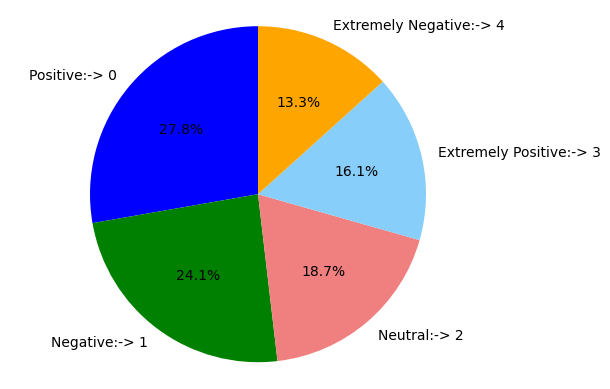

In [88]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive:-> 0', 'Negative:-> 1', 'Neutral:-> 2', 'Extremely Positive:-> 3', 'Extremely Negative:-> 4']
colors = ['blue', 'green', 'lightcoral', 'lightskyblue', 'orange']
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

In [89]:
test['Sentiment']=test['Sentiment'].map(one_hot_encoding)

In [90]:
test['Sentiment'].value_counts()

1    1041
0     947
2     619
3     599
4     592
Name: Sentiment, dtype: int64

**4.1 Bar plot for tweets sentiment distribution on test data**

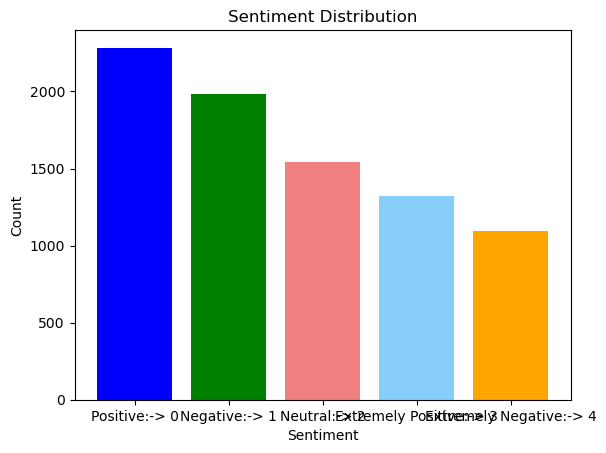

In [91]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive:-> 0', 'Negative:-> 1', 'Neutral:-> 2', 'Extremely Positive:-> 3', 'Extremely Negative:-> 4']
colors = ['blue', 'green', 'lightcoral', 'lightskyblue', 'orange']
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [92]:
x = train["OriginalTweet"].copy()
y = train["Sentiment"].copy()

In [93]:
x.shape

(8229,)

In [94]:
x.head()

0    see british public clearli ca n't behav stockp...
1    feel young noth stay forev stay  oil price hit...
2                       readi  10 consum post- world  
3    plz understand covid-19 decim market fals infl...
4    brexitwatch like gun singapor  face wrong way ...
Name: OriginalTweet, dtype: object

In [95]:
y.shape

(8229,)

In [96]:
y.head()

0    0
1    3
2    0
3    0
4    1
Name: Sentiment, dtype: int64

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  8229 non-null   object
 1   Sentiment      8229 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.7+ KB


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.5+ KB


In [99]:
train.describe()

,Sentiment
count,8229.000000
mean,1.631182
std,1.381683
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,4.000000


In [100]:
test.describe()

,Sentiment
count,3798.000000
mean,1.696682
std,1.400419
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


In [101]:
x.isnull().sum()

0

In [102]:
y.isnull().sum()

0

In [103]:
x.dtypes

dtype('O')

In [104]:
y.dtypes

dtype('int64')

# **5 5. Vectorization**
**5.1 a. TF-IDF**

In [105]:
# TfidfVectorizer from sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)

**5.2 b. BoW**

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
denselist = X.todense().tolist()
train = pd.DataFrame(denselist, columns=feature_names)

# **6. Model Application**

In [109]:
x

0       see british public clearli ca n't behav stockp...
1       feel young noth stay forev stay  oil price hit...
2                          readi  10 consum post- world  
3       plz understand covid-19 decim market fals infl...
4       brexitwatch like gun singapor  face wrong way ...
                              ...                        
8224    countri benefit low oil price  1 - china benef...
8225    love peopl return someth store  pleas let wait...
8226    everybodi lick top blue bell ice cream groceri...
8227                   pleas stop exorbit opportun consum
8228                                        donât think 
Name: OriginalTweet, Length: 8229, dtype: object

In [110]:
y

0       0
1       3
2       0
3       0
4       1
       ..
8224    0
8225    0
8226    0
8227    1
8228    2
Name: Sentiment, Length: 8229, dtype: int64

**6.0.1 Train Test Split**

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(train,y,train_size=0.8,random_state=0)

In [113]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((6583, 1000), (1646, 1000), (6583,), (1646,))

**6.1 a. Linear Regression**

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lin_reg=LinearRegression()

In [116]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [117]:
lin_reg_ypred=lin_reg.predict(x_test)

In [118]:
lin_reg_acc=lin_reg.score(x_test,y_test)

In [119]:
lin_reg_acc

-0.035459907939594304

**7 b. Logistic Regression**

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log_reg=LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')

In [122]:
log_reg.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [123]:
log_reg_ypred=log_reg.predict(x_test)

In [124]:
log_reg_acc=log_reg.score(x_test,y_test)

In [125]:
log_reg_acc

0.5103280680437424

**7.1 c. Decision Tree**

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dt_lcf=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2,min_samples_split=2,max_leaf_nodes=3)

In [128]:
dt_lcf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [129]:
dt_ypred=dt_lcf.predict(x_test)

In [130]:
dt_acc=dt_lcf.score(x_test,y_test)

In [131]:
dt_acc

0.32138517618469015

**7.2 d. Random Forest**

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf_clf=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=4,min_samples_split=2, min_samples_leaf=1,random_state=0)

In [134]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [135]:
rf_ypred=rf_clf.predict(x_test)

In [136]:
rf_acc=rf_clf.score(x_test,y_test)

In [137]:
rf_acc

0.3159173754556501

**7.3 e. KNN**

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=5,weights='distance')

In [140]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [141]:
knn_ypred=knn.predict(x_test)

In [142]:
knn_acc=knn.score(x_test,y_test)

In [143]:
knn_acc

0.284325637910085

# **7. Drawing Plots to presents Results**

In [144]:
names=['Linear Regression','Logistic Regression', 'Decision TreeClassification' ,'Random Forest Classification','KNN']
acc=[lin_reg_acc,log_reg_acc,rf_acc,rf_acc,knn_acc]

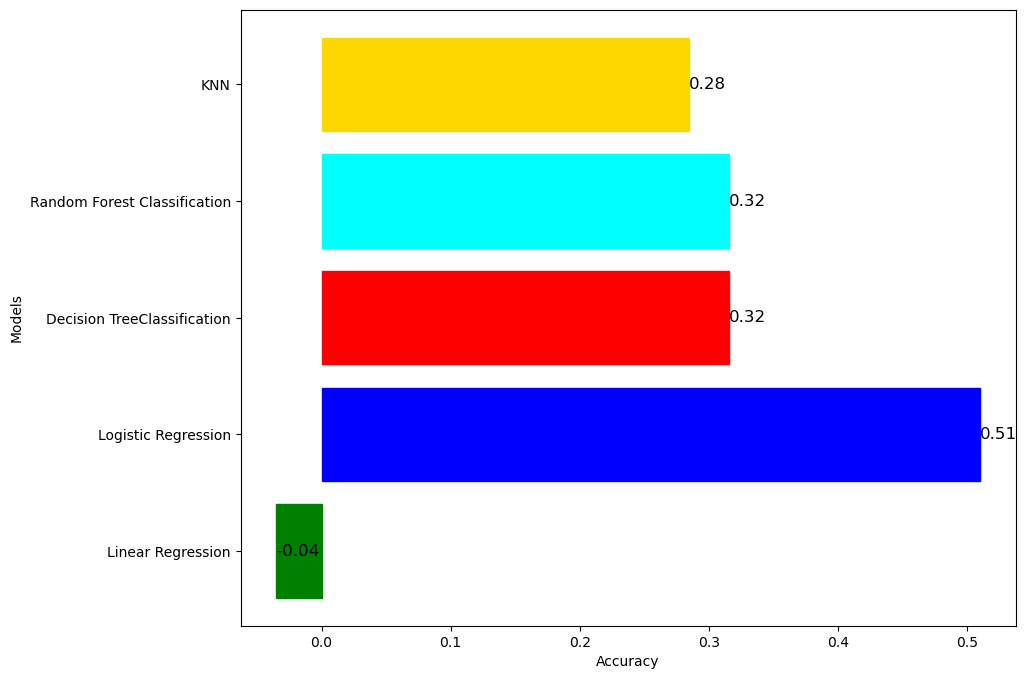

In [145]:
plt.figure(figsize=(10, 8))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('green')
graph[1].set_color('blue')
graph[2].set_color('red')
graph[3].set_color('cyan')
graph[4].set_color('gold')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

# **8. HyperParameter Tuning**

In [146]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

**i. Logistic Regression**

In [147]:
param_grid = {'C': [0.1, 1, 10],'penalty': ['l2']}

In [148]:
lr = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

In [149]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [150]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best accuracy:  0.48412171440572543


In [151]:
y_pred_log_ht = grid_search.predict(x_test)

In [152]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**ii. Decision Tree**

In [153]:
param_grid = {'max_depth': [2, 4],'min_samples_split': [2, 5],'min_samples_leaf': [1]}

In [154]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

In [155]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5]})

In [156]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.31687380133073917


In [157]:
y_pred_dt_ht = grid_search.predict(x_test)

In [158]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**iii. Random Forest**

In [159]:
param_grid = {'n_estimators': [50],'max_depth': [2, 4],'min_samples_split': [2, 5],'min_samples_leaf': [1]}

In [160]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [161]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5], 'n_estimators': [50]})

In [162]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.31125485525960495


In [163]:
y_pred_rf_ht = grid_search.predict(x_test)

In [164]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**iv. KNN**

In [165]:
param_grid = {'n_neighbors': [3, 5],'weights': ['uniform', 'distance']}

In [166]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,n_jobs=-1)

In [167]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [168]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 3, 'weights': 'distance'}
Best accuracy:  0.2968259353370583


In [169]:
y_pred_knn_ht = grid_search.predict(x_test)

In [170]:
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn_ht))

Confusion matrix:  [[ 73  79 305   8   9]
 [ 35 112 217   2  14]
 [ 17  16 259   3   3]
 [ 62  35 146  17  10]
 [ 22  57 103   1  41]]


In [171]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [172]:
log_reg_acc_ht=accuracy_score(y_test,y_pred_log_ht)
log_reg_acc_ht

0.49817739975698666

In [173]:
dt_acc_ht=accuracy_score(y_test,y_pred_dt_ht)
dt_acc_ht

0.31713244228432563

In [174]:
rf_acc_ht=accuracy_score(y_test,y_pred_rf_ht)
rf_acc_ht

0.3086269744835966

In [175]:
knn_acc_ht=accuracy_score(y_test,y_pred_knn_ht)
knn_acc_ht

0.30498177399756987

# **Drawing Plots to presents Results after hyper parameter tuning**

In [176]:
names=['Logistic Regression', 'Decision Tree Classification' ,'Random Forest Classification','KNN']
acc=[log_reg_acc_ht,dt_acc_ht,rf_acc_ht,knn_acc_ht]

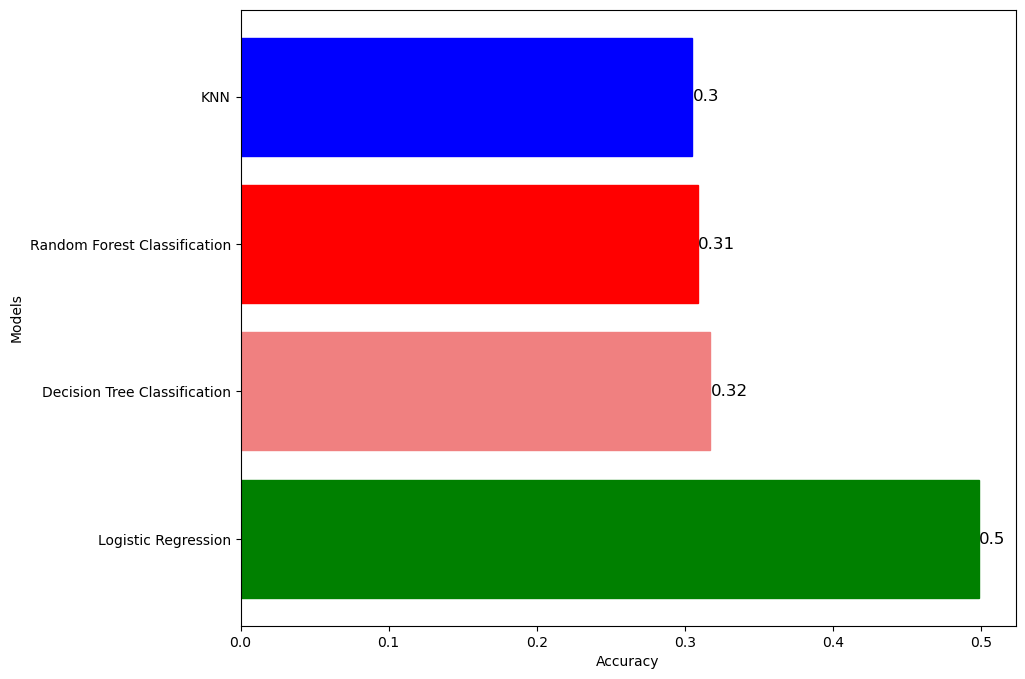

In [177]:
plt.figure(figsize=(10, 8))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('green')
graph[1].set_color('lightcoral')
graph[2].set_color('red')
graph[3].set_color('blue')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()